In [1]:
import sys
import json
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly
plotly.io.orca.config.executable = "C:/Users/agrasso/Anaconda3/envs/covid19/orca_app/orca.exe"

path_root = '../..'
sys.path.append(f'{path_root}/')
from src.visualize.visualizer import ChoroplethMap

level = 'regioni'

path_data = f'{path_root}/data'
# Paths dependant on path_data
path_img = f'{path_data}/imgs/mappe/vaccine'
path_csv = f'{path_data}/csv/vaccine'
path_geojson = f'{path_data}/geojson'

csv_in_name = f'{path_csv}/riepilogo.csv'
geojson_regions_name = f'{path_geojson}/Italy_NUTS_23.json'

In [2]:
# Read geojson NUTS 2 file
with open(geojson_regions_name, encoding='utf-8') as geojson_regions:
    json_regions = json.load(geojson_regions)
properties = json_regions['features'][0]['properties']
properties

{'reg_name': 'Piemonte', 'reg_istat_code_num': 1, 'reg_istat_code': '01'}

In [3]:
df = pd.read_csv(csv_in_name)
last_date = df.ultimo_aggiornamento[0]
df.columns

Index(['area', 'dosi_somministrate', 'dosi_consegnate',
       'percentuale_somministrazione', 'ultimo_aggiornamento', 'codice_nuts1',
       'codice_nuts2', 'codice_regione_istat', 'nome_area'],
      dtype='object')

In [4]:
# Define figures properties
fig_prop = {'title': last_date,
            'path_root': path_img,
            'dosi_consegnate': {'colorbar_title': 'Dosi consegnate', 'file_name': 'dosi_consegnate'},
            'percentuale_somministrazione': {'colorbar_title': 'Percentuale somministrazione', 'file_name': 'percentuale_somministrazione'}}

In [5]:
# Construct object with dataframe and geojson data
cm = ChoroplethMap(df=df,
                   geo_map=json_regions,
                   geo_col='codice_regione_istat',
                   geo_prop='properties.reg_istat_code_num',
                   fig_prop=fig_prop)

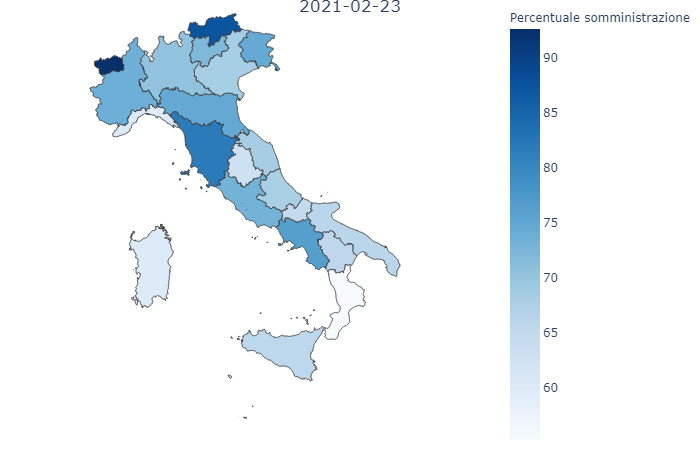

In [6]:
# New positives
col = 'percentuale_somministrazione'
fig = cm.draw_map(col=col, color={'type': 'seq', 'scale': 'Blues'})
# cm.save(fig=fig, col=col)

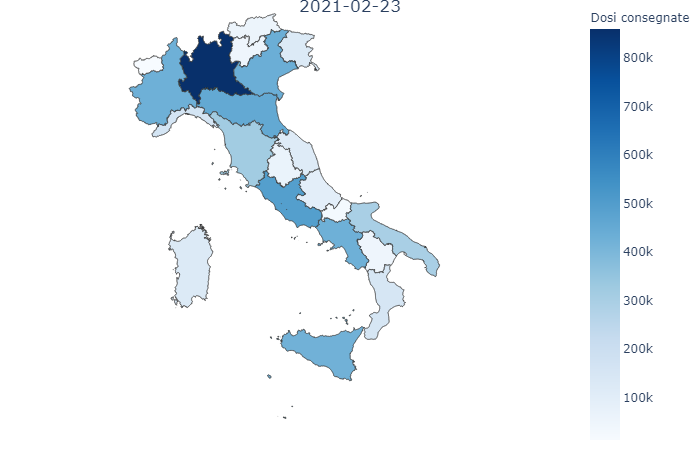

In [7]:
# New positives
col = 'dosi_consegnate'
fig = cm.draw_map(col=col, color={'type': 'seq', 'scale': 'Blues'})
# cm.save(fig=fig, col=col)